## EDA Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [5]:
df = pd.read_csv("C:\\Users\\Khan Mokhit\\Downloads\\stud.csv")

In [6]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [7]:
df.shape

(1000, 8)

In [8]:
# Total information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [20]:
# Statistical information of the dataset

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [21]:
# Checking the null values

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
list(df.columns)   

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [22]:
# Data types of all of the columns

df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [23]:
# Checking duplicate records

df[df.duplicated()] # As we can see we don't have duplicates

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


In [24]:
# Checking the counts of the categories in the categorical columns or features

df['race_ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

In [19]:
df['parental_level_of_education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [26]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


#### Segregate numerical and categorical features

In [31]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes !='O']

In [32]:
numerical_feature

['math_score', 'reading_score', 'writing_score']

In [33]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes =='O']

In [34]:
categorical_feature

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [35]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [36]:
df['race_ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

### Agregate the total score with mean

In [37]:
df['total_score'] = (df['math_score'] + df['reading_score'] + df['writing_score'])

In [40]:
df['average'] = round(df['total_score']/3)

In [41]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73.0
1,female,group C,some college,standard,completed,69,90,88,247,82.0
2,female,group B,master's degree,standard,none,90,95,93,278,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.0
4,male,group C,some college,standard,none,76,78,75,229,76.0
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.0
996,male,group C,high school,free/reduced,none,62,55,55,172,57.0
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.0
998,female,group D,some college,standard,completed,68,78,77,223,74.0


## Exploring more visualizations

<AxesSubplot:xlabel='average', ylabel='Count'>

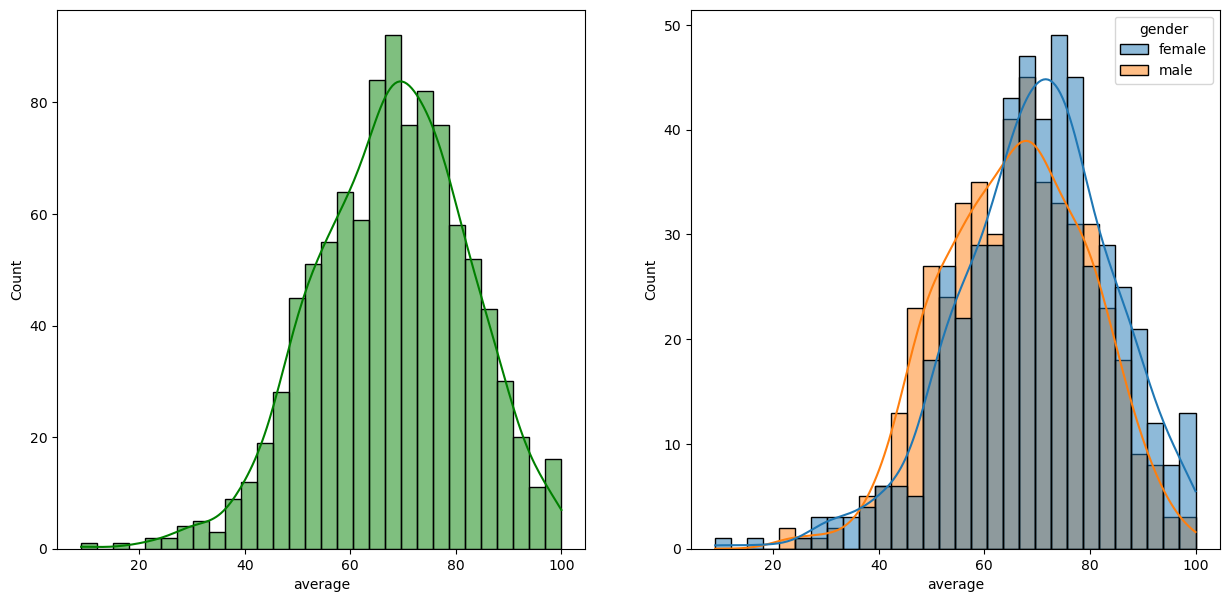

In [48]:
plt.axis = plt.subplots(1,2,figsize = (15,7))

# This one is for first graph

plt.subplot(121)
sns.histplot(data = df , x = df['average'] , bins = 30 , kde = True , color = 'g')

# This code is for second one

plt.subplot(122)
sns.histplot(data = df , x = df['average'] , bins = 30 , kde = True , color = 'g' , hue = 'gender')

# Insights or Conclusion
- Female students tends to perform well that Male students

### Now we will see according to the lunch factor

<AxesSubplot:xlabel='average', ylabel='Count'>

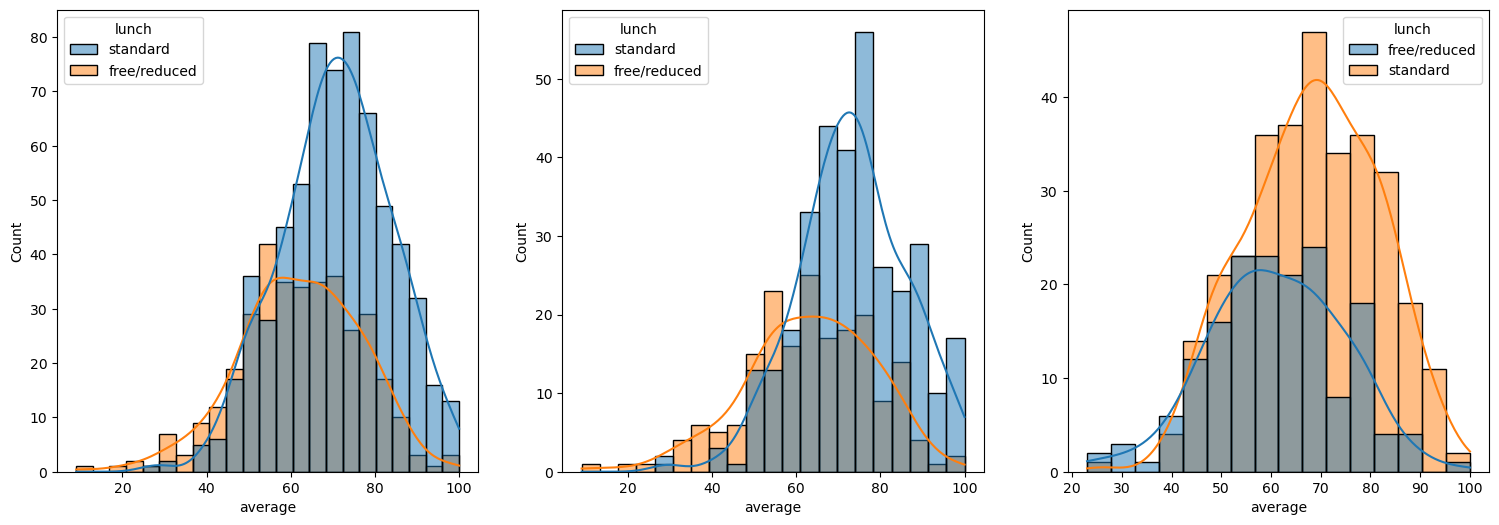

In [55]:
plt.axis = plt.subplots(1,3,figsize=(25,6))

plt.subplot(141)
sns.histplot(data = df , x = 'average' , kde = True , hue = 'lunch')

plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'] , x = 'average' , kde = True , hue = 'lunch')

plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'] , x = 'average' , kde = True , hue = 'lunch')

# Conclusions :

- Students who prefer standard lunch have more average score as compared to the free of reduced lunch
- In the second graph which is only for the female in that also we can see that the same and in the third one which only for males that also resulting same in case of the lunch

# Insights :
- Standard lunch helps students to perform well in exam
- This results same in both cases of male and females

### In case of  parental_level_of_education

<AxesSubplot:xlabel='average', ylabel='Count'>

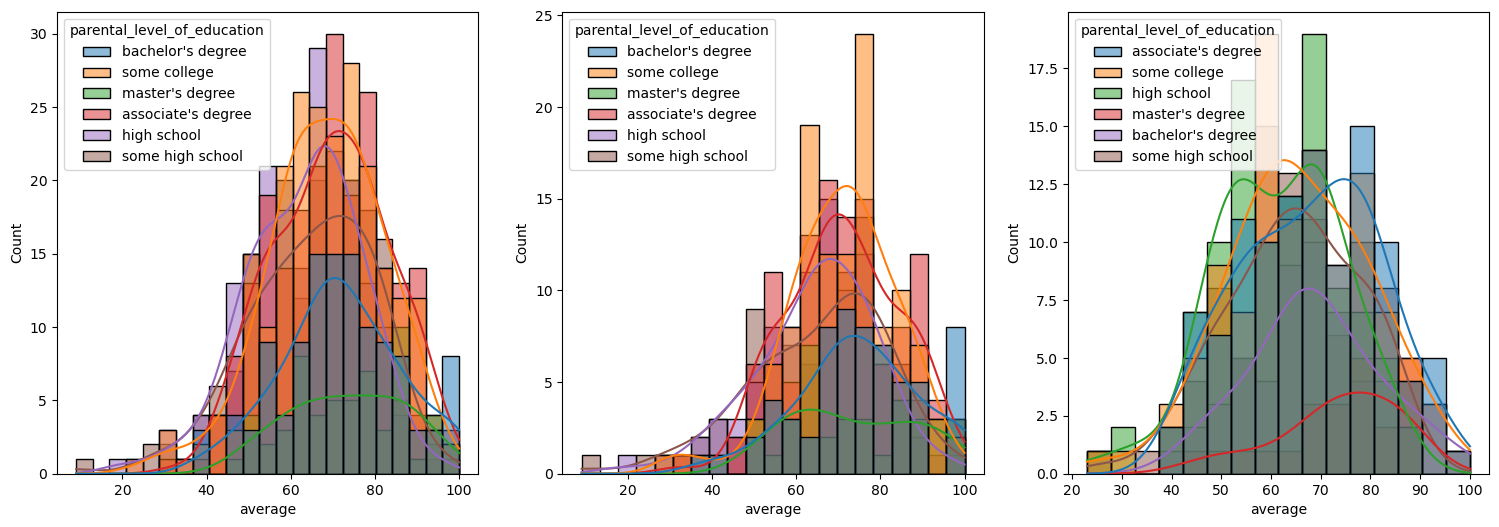

In [57]:
plt.axis = plt.subplots(1,3,figsize=(25,6))

plt.subplot(141)
sns.histplot(data = df , x = 'average' , kde = True , hue = 'parental_level_of_education')

plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'] , x = 'average' , kde = True , hue = 'parental_level_of_education')

plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'] , x = 'average' , kde = True , hue = 'parental_level_of_education')

# Observations :

- In general parent's education don't help students to perform well in exam .
- 3rd plot shows that the parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam .
- 2nd plot we can see that there is no effect of parent's education in case of female students

# In case of race_ethnicity

<AxesSubplot:xlabel='average', ylabel='Count'>

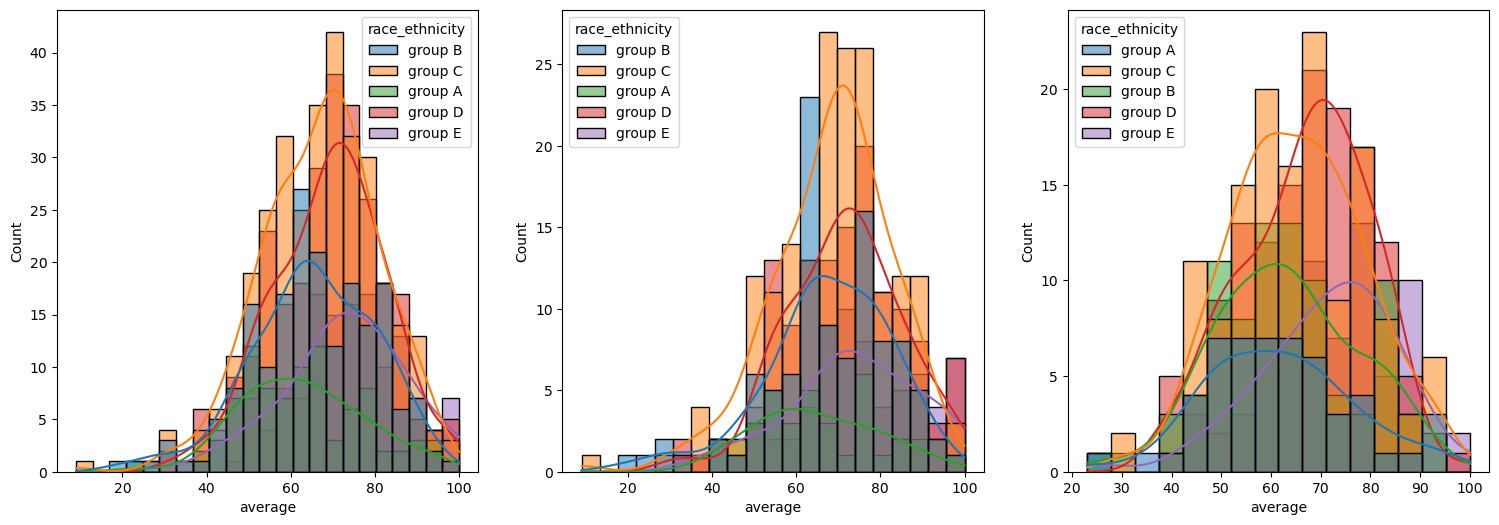

In [58]:
plt.axis = plt.subplots(1,3,figsize=(25,6))

plt.subplot(141)
sns.histplot(data = df , x = 'average' , kde = True , hue = 'race_ethnicity')

plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'] , x = 'average' , kde = True , hue = 'race_ethnicity')

plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'] , x = 'average' , kde = True , hue = 'race_ethnicity')

# Insights :

- Students of group A and group B tends to perform poorly in exam .
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

# In case of test_preparation_course

<AxesSubplot:xlabel='average', ylabel='Count'>

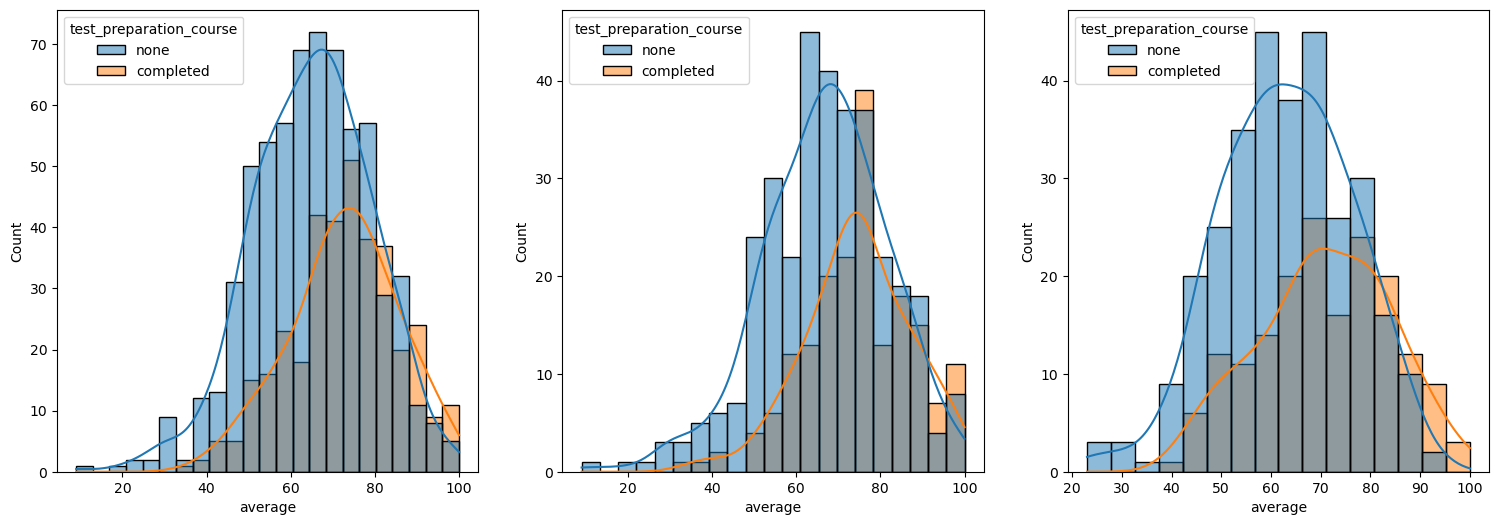

In [59]:
plt.axis = plt.subplots(1,3,figsize=(25,6))

plt.subplot(141)
sns.histplot(data = df , x = 'average' , kde = True , hue = 'test_preparation_course')

plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'] , x = 'average' , kde = True , hue = 'test_preparation_course')

plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'] , x = 'average' , kde = True , hue = 'test_preparation_course')

# Insights :

- In 3 of the cases we can clearly see that the test preperation class factor doesn't tend students to perform better in the exam whether it is male or female it resulting the same

# Now we can see the correlation of the features of this data 

In [60]:
df.corr()

,math_score,reading_score,writing_score,total_score,average
math_score,1.000000,0.817580,0.802642,0.918746,0.918442
reading_score,0.817580,1.000000,0.954598,0.970331,0.970143
writing_score,0.802642,0.954598,1.000000,0.965667,0.965643
total_score,0.918746,0.970331,0.965667,1.000000,0.999820
average,0.918442,0.970143,0.965643,0.999820,1.000000


### Visualiztion

<AxesSubplot:>

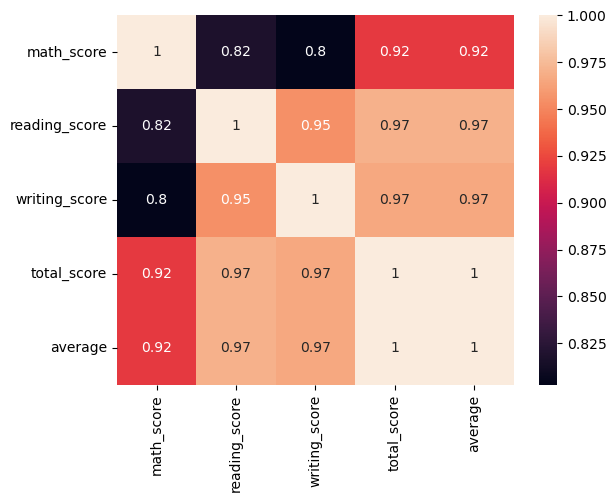

In [62]:
sns.heatmap(df.corr() , annot = True)

- In this heatmap as the color is more dark that means that the correlation is more negetive and as the color is more light the correlation is more positive 
- Now we can clearly see that the color is more light as compared the dark portion that means that the feature present in the data are more positively correlated